___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px
import matplotlib.gridspec as gridspec

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0
284806,172792.00,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,-0.41,0.49,...,0.26,0.64,0.38,0.01,-0.47,-0.82,-0.00,0.01,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,-0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,-0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


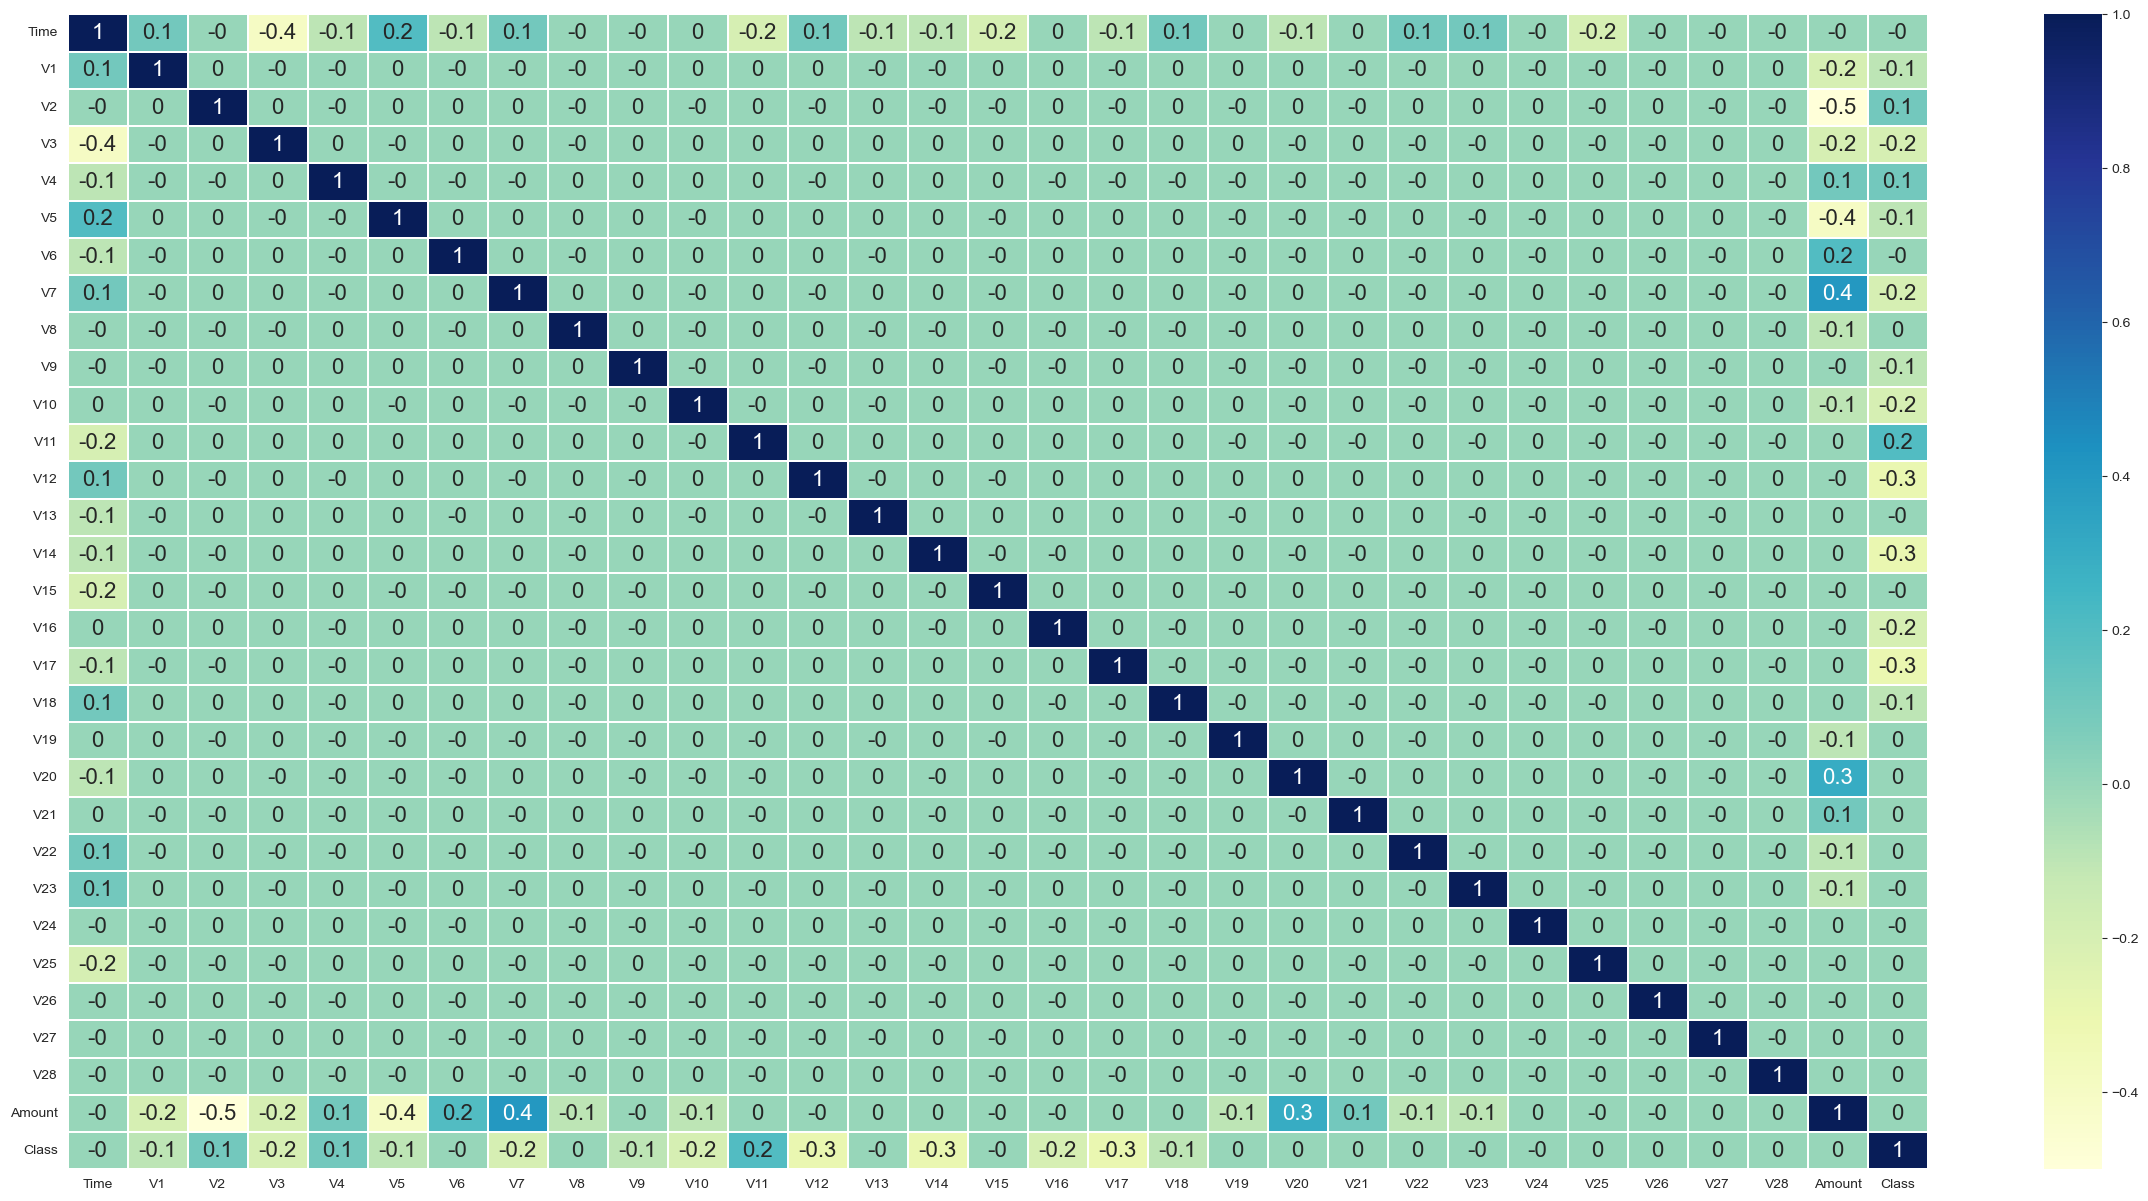

In [7]:
plt.figure(figsize = (30, 15))
sns.heatmap(round(df.corr(), 1), annot = True,cmap="YlGnBu", linewidth = 0.2, annot_kws = {'size' : 16});

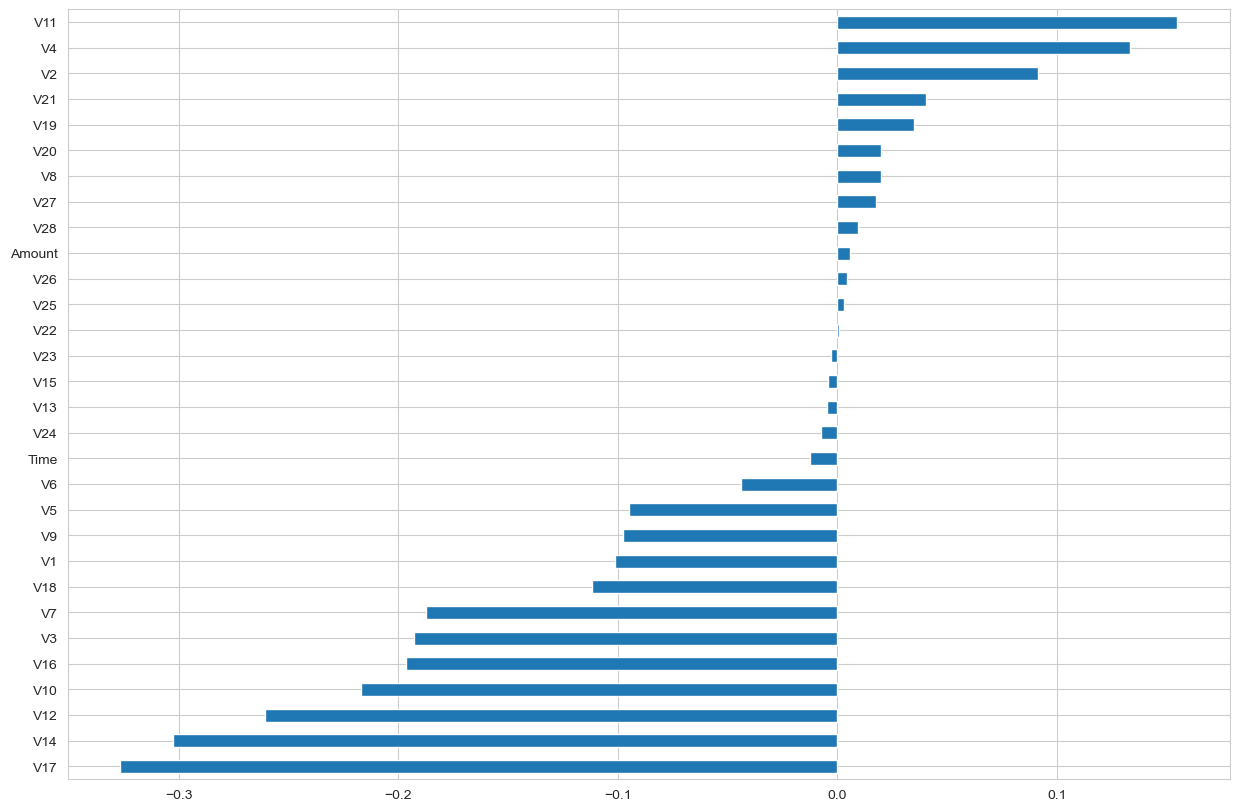

In [8]:
plt.figure(figsize=(15,10))
df.corr()["Class"].drop("Class").sort_values().plot.barh();

### Data Cleaning
Check Missing Values and Outliers

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

1081

In [11]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(283726, 31)

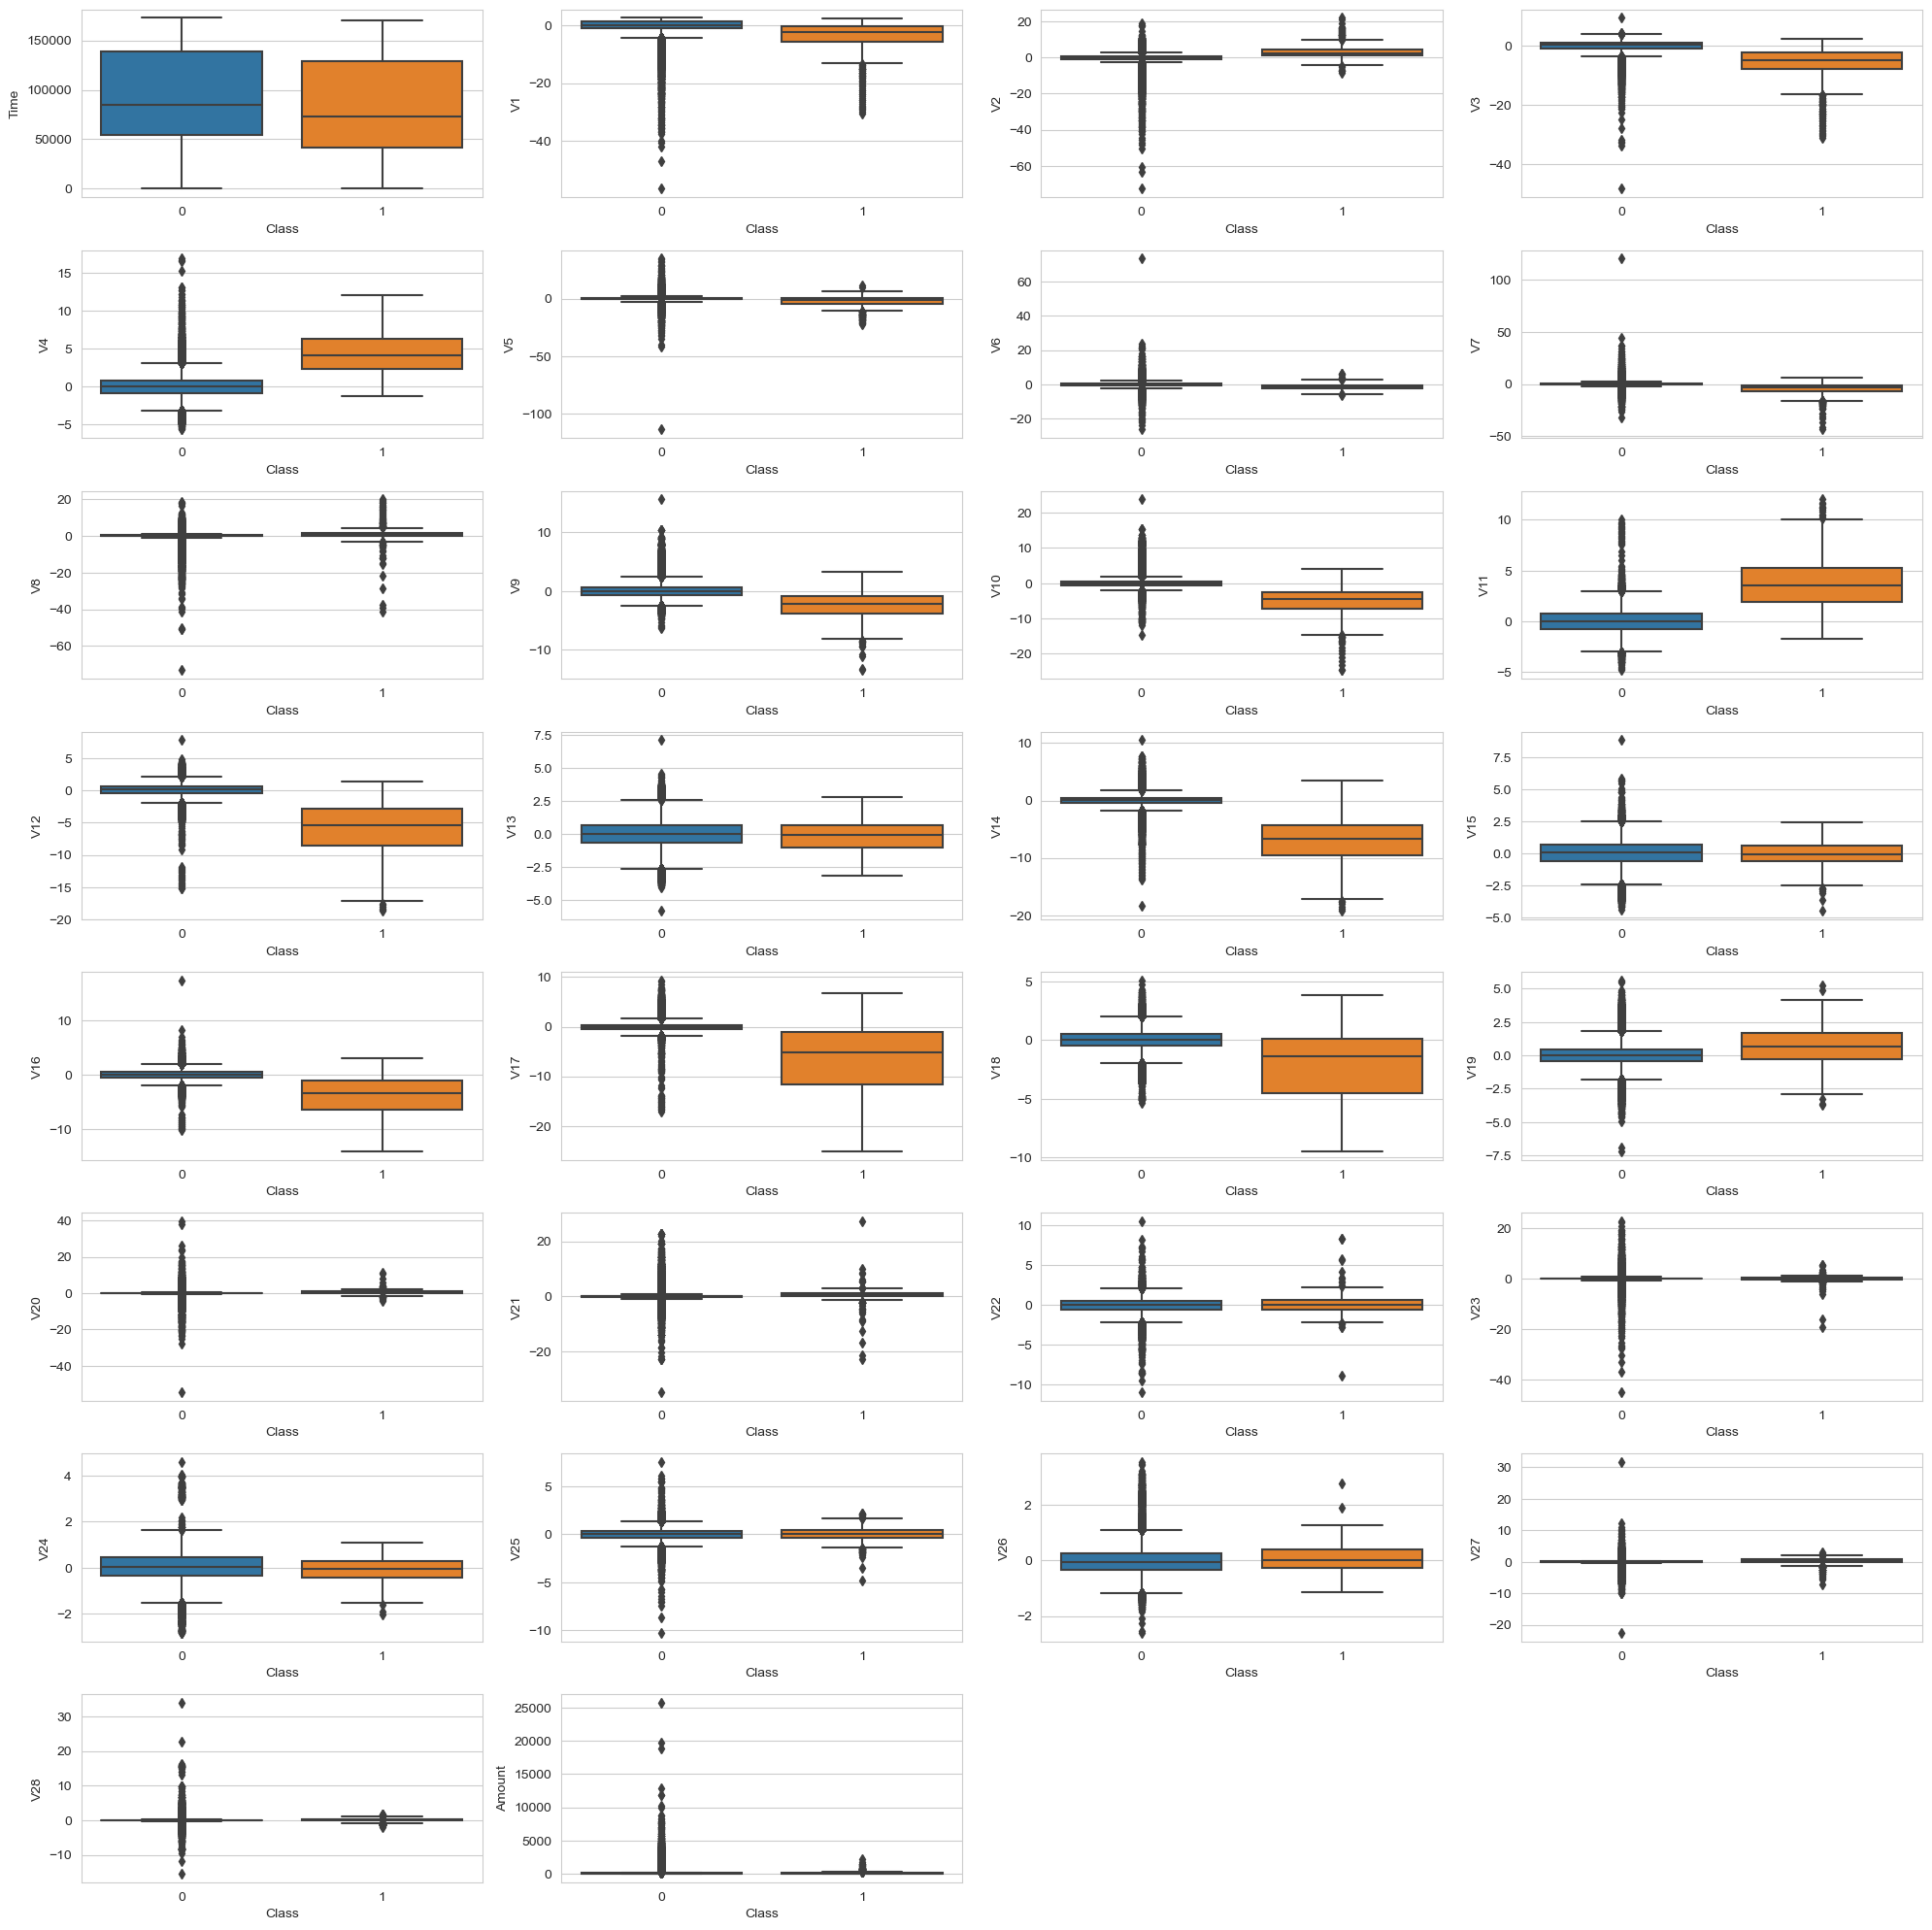

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'Class' :
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x = 'Class', y = feature, data = df)
plt.tight_layout()
plt.show();

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(["Class","Time"],axis=1)
y = df["Class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [16]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,2.24,-1.72,-2.15,-2.58,0.99,3.57,-1.79,0.86,-1.26,1.57,...,-0.32,-0.15,-0.05,0.28,0.68,-0.22,-0.16,0.04,-0.05,32.00
134253,-1.32,1.63,0.60,-0.04,-0.40,-0.97,0.21,0.74,-1.27,-0.48,...,-0.07,-0.24,-0.95,0.32,0.52,-0.71,-0.27,-0.02,0.05,6.99
186465,1.91,0.02,-2.09,0.13,1.16,0.61,-0.02,0.18,0.28,-0.50,...,-0.21,0.29,1.10,-0.04,-1.69,0.11,0.01,0.05,-0.05,14.95
149493,1.81,0.32,0.32,3.88,0.05,1.02,-0.73,0.23,0.68,1.15,...,-0.23,0.14,0.70,0.17,0.70,-0.21,-0.01,-0.02,-0.04,17.30
18461,1.36,-1.12,0.55,-1.55,-1.19,0.28,-1.20,0.21,-2.09,1.49,...,-0.36,-0.34,-0.64,0.25,-0.34,-0.06,-0.44,0.06,0.01,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,-0.10,-0.38,0.20,-0.73,0.34,-0.25,0.84,-0.40,-1.42,0.67,...,0.03,0.15,1.01,0.00,-0.46,-0.42,0.01,0.04,-0.00,124.00
3525,-1.71,-1.30,1.95,-2.28,-0.51,0.41,0.33,0.48,1.06,-2.02,...,0.56,0.47,0.86,0.36,-0.26,0.42,0.07,-0.03,0.08,261.80
242674,-0.88,1.16,0.57,1.18,-0.21,0.26,0.37,0.44,-0.01,-0.19,...,-0.35,-0.10,-0.16,0.05,-0.01,-0.51,-0.77,-0.24,0.09,37.00
60594,1.25,0.35,0.59,0.98,-0.22,-0.45,-0.01,-0.14,0.05,-0.07,...,-0.04,-0.21,-0.56,0.04,-0.13,0.40,-0.60,0.04,0.03,5.00


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

#### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score

In [22]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

In [23]:
log_model = Pipeline(steps=operations)

In [24]:
log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [25]:
eval_metric(log_model,X_train, y_train, X_test, y_test)

Test_Set
[[56641    10]
 [   40    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226570     32]
 [   140    238]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.63      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.87    226980
weighted avg       1.00      1.00      1.00    226980



In [26]:
from sklearn.model_selection import cross_validate

In [27]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
log_model = Pipeline(operations)

scores = cross_validate(log_model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.69,0.01,0.90,0.51,0.66,1.00
2,0.87,0.01,0.88,0.59,0.71,1.00
3,0.75,0.01,0.84,0.55,0.67,1.00
4,0.79,0.01,0.89,0.66,0.76,1.00
5,0.75,0.01,0.79,0.68,0.73,1.00
6,0.71,0.01,0.85,0.58,0.69,1.00
7,0.78,0.01,0.86,0.66,0.75,1.00
8,0.73,0.01,0.84,0.55,0.67,1.00
9,0.77,0.01,0.85,0.74,0.79,1.00
10,0.64,0.02,0.90,0.68,0.78,1.00



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [28]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

In [29]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
log_model = Pipeline(operations)
log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

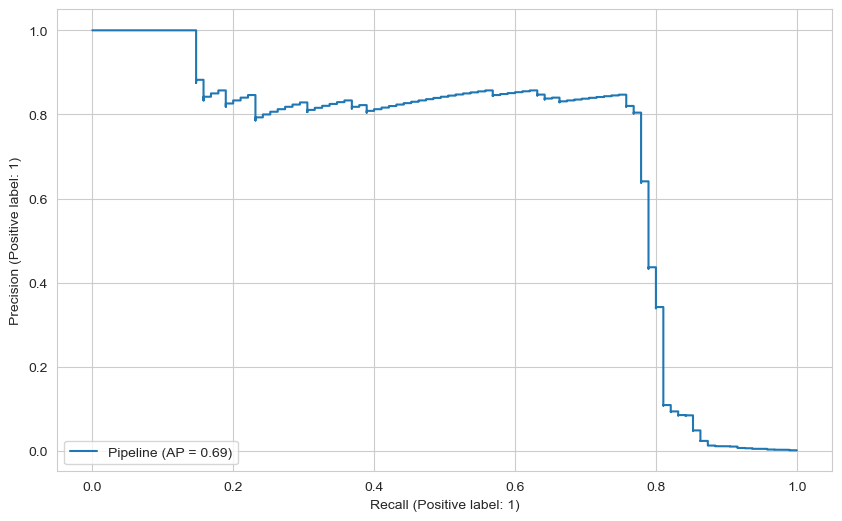

In [30]:
plot_precision_recall_curve(log_model, X_test, y_test);

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

***ii. Model Training***

In [32]:
class_weights = {0:1, 1:15}

In [33]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
log_weight_model = Pipeline(steps=operations)
log_weight_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 15}))])

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [34]:
eval_metric(log_weight_model, X_train, y_train, X_test, y_test)

Test_Set
[[56631    20]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.79      0.79        95

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226466    136]
 [    64    314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.70      0.83      0.76       378

    accuracy                           1.00    226980
   macro avg       0.85      0.92      0.88    226980
weighted avg       1.00      1.00      1.00    226980



In [35]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
log_weight_model = Pipeline(operations)

scores = cross_validate(log_weight_model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.64,0.01,0.71,0.78,0.74,1.00
2,0.64,0.01,0.83,0.81,0.82,1.00
3,0.66,0.01,0.64,0.79,0.71,1.00
4,0.62,0.01,0.70,0.79,0.74,1.00
5,0.60,0.01,0.68,0.89,0.77,1.00
6,0.57,0.01,0.73,0.84,0.78,1.00
7,0.52,0.01,0.67,0.84,0.74,1.00
8,0.56,0.01,0.66,0.76,0.71,1.00
9,0.54,0.01,0.67,0.87,0.76,1.00
10,0.62,0.01,0.74,0.89,0.81,1.00


In [36]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
log_weight_model = Pipeline(operations)
log_weight_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 15}))])

In [37]:
y_pred = log_weight_model.predict(X_test)
y_pred_proba = log_weight_model.predict_proba(X_test)

In [38]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [39]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
166454,0,0,0.00,1.00
112261,0,0,0.00,1.00
67690,0,0,0.00,1.00
42716,0,0,0.00,1.00
195069,0,0,0.00,1.00
108182,0,0,0.00,1.00
134161,0,0,0.00,1.00
88675,0,0,0.00,1.00
277282,0,0,0.01,0.99
51950,0,0,0.00,1.00


In [40]:
y_pred_proba = log_weight_model.predict_proba(X_train)
log_weighted_ap = average_precision_score(y_train, y_pred_proba[:,1])

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [42]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.7245199283017063

In [43]:
from sklearn.model_selection import StratifiedKFold   

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)    
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [44]:
CV(10, log_weight_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.93%  std 0.02%
Precision-1   77.82%  std 7.41%
Recall-1      81.20%  std 5.75%
F1_score-1    79.20%  std 4.69%


***iv.  Plot Precision and Recall Curve***


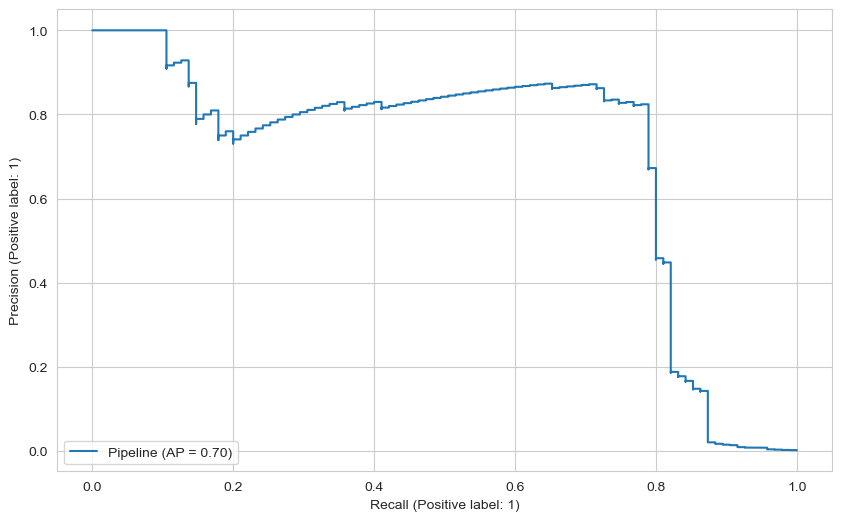

In [45]:
plot_precision_recall_curve(log_weight_model, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [46]:
y_pred=log_weight_model.predict(X_test)
y_pred_proba = log_weight_model.predict_proba(X_test)

In [47]:
log_ap=average_precision_score(y_test, y_pred_proba[:,1])
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_ap,log_f1,log_recall

(0.700884987070685, 0.7894736842105263, 0.7894736842105263)

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
class_weights = {0 : 1, 1 : 1}

In [50]:
rf_model=RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, random_state=42)

In [51]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56649     2]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     1    377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [52]:
#rf_model=RandomForestClassifier(class_weight=class_weights, random_state=42)

In [53]:
#param_grid = {"n_estimators":[50,100],
            # "max_depth": [10,15,20]}

In [54]:
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV

In [55]:
#rf_grid_model=GridSearchCV(rf_model,
                     #param_grid,
                     #scoring='recall',
                     #verbose=3,
                     #n_jobs = -1)

In [56]:
#rf_grid_model.fit(X_train,y_train)

In [57]:
#rf_grid_model.best_params_

In [58]:
#rf_grid_model.best_score_

In [59]:
rf_model=RandomForestClassifier(class_weight=class_weights,max_depth=15, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=15, random_state=42)

In [60]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56650     1]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.75      0.85        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.93     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [    45    333]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      0.88      0.94       378

    accuracy                           1.00    226980
   macro avg       1.00      0.94      0.97    226980
weighted avg       1.00      1.00      1.00    226980



***iii. Plot Precision and Recall Curve***


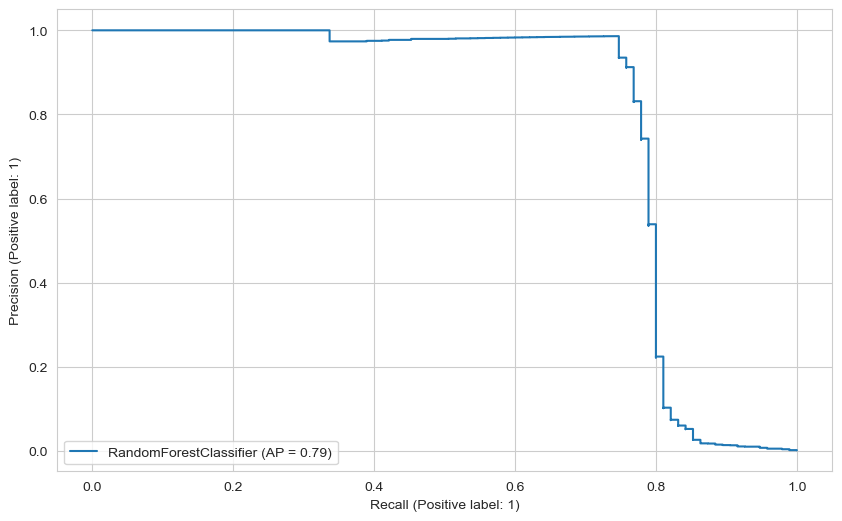

In [61]:
plot_precision_recall_curve(rf_model, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [62]:
y_pred=rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

In [63]:
rf_ap=average_precision_score(y_test, y_pred_proba[:,1])
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_ap,rf_f1,rf_recall

(0.7882154674577753, 0.8502994011976047, 0.7473684210526316)

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [64]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

In [65]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50083406, 0.50083406, 0.50083406, ..., 0.50083406, 0.50083406,
       0.50083406])

In [66]:
xgb_model=XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train,sample_weight=classes_weights)

[22:36:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[56646     5]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.76      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [68]:
#xgb_model=XGBClassifier(random_state=42)

In [69]:
#param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             #"subsample":[0.5, 0.8, 1]}

In [70]:
#xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [71]:
#xgb_grid_model.fit(X_train,y_train,sample_weight=classes_weights)

In [72]:
#xgb_grid_model.best_params_

In [73]:
#xgb_grid_model.best_score_

In [74]:
xgb_model=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.2,subsample=0.5,random_state=42)
xgb_model.fit(X_train,y_train)

[22:36:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[56647     4]
 [   26    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.73      0.82        95

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



***iii. Plot Precision and Recall Curve***


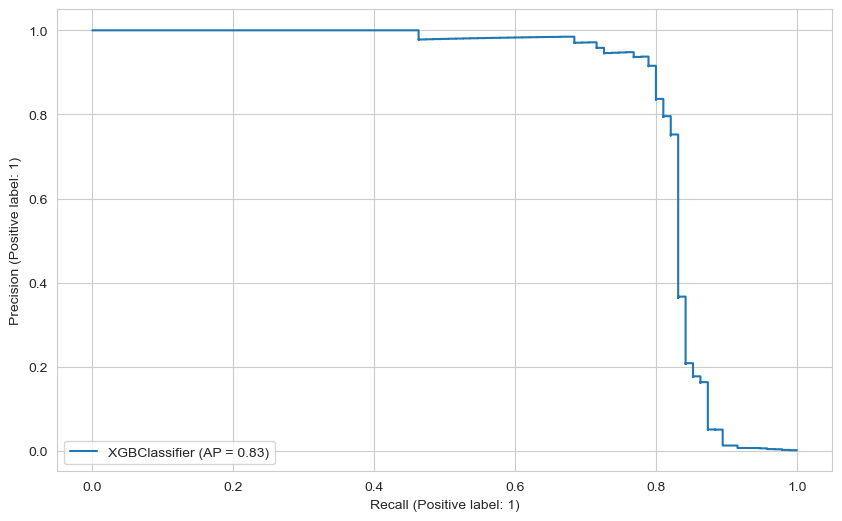

In [76]:
plot_precision_recall_curve(xgb_model, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [77]:
y_pred=xgb_model.predict(X_test)
y_pred_proba =xgb_model.predict_proba(X_test)

In [78]:
xgb_ap=average_precision_score(y_test, y_pred_proba[:,1])
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_ap,xgb_f1,xgb_recall

(0.8267513144359108, 0.8214285714285715, 0.7263157894736842)

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

***ii. Define Model***

In [80]:
seed = 42

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [82]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,2.24,-1.72,-2.15,-2.58,0.99,3.57,-1.79,0.86,-1.26,1.57,...,-0.32,-0.15,-0.05,0.28,0.68,-0.22,-0.16,0.04,-0.05,32.00
134253,-1.32,1.63,0.60,-0.04,-0.40,-0.97,0.21,0.74,-1.27,-0.48,...,-0.07,-0.24,-0.95,0.32,0.52,-0.71,-0.27,-0.02,0.05,6.99
186465,1.91,0.02,-2.09,0.13,1.16,0.61,-0.02,0.18,0.28,-0.50,...,-0.21,0.29,1.10,-0.04,-1.69,0.11,0.01,0.05,-0.05,14.95
149493,1.81,0.32,0.32,3.88,0.05,1.02,-0.73,0.23,0.68,1.15,...,-0.23,0.14,0.70,0.17,0.70,-0.21,-0.01,-0.02,-0.04,17.30
18461,1.36,-1.12,0.55,-1.55,-1.19,0.28,-1.20,0.21,-2.09,1.49,...,-0.36,-0.34,-0.64,0.25,-0.34,-0.06,-0.44,0.06,0.01,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,-0.10,-0.38,0.20,-0.73,0.34,-0.25,0.84,-0.40,-1.42,0.67,...,0.03,0.15,1.01,0.00,-0.46,-0.42,0.01,0.04,-0.00,124.00
3525,-1.71,-1.30,1.95,-2.28,-0.51,0.41,0.33,0.48,1.06,-2.02,...,0.56,0.47,0.86,0.36,-0.26,0.42,0.07,-0.03,0.08,261.80
242674,-0.88,1.16,0.57,1.18,-0.21,0.26,0.37,0.44,-0.01,-0.19,...,-0.35,-0.10,-0.16,0.05,-0.01,-0.51,-0.77,-0.24,0.09,37.00
60594,1.25,0.35,0.59,0.98,-0.22,-0.45,-0.01,-0.14,0.05,-0.07,...,-0.04,-0.21,-0.56,0.04,-0.13,0.40,-0.60,0.04,0.03,5.00


In [83]:
scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
tf.random.set_seed(seed)

model= Sequential()

model.add(Dense(60, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(45, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

2022-11-09 22:36:50.063391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


***iii. Compile Model***

In [86]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

***iv. Fit Model***

In [87]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5, restore_best_weights = True)

In [88]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], verbose=1)

Epoch 1/200
6384/6384 [==============================] - 6s 901us/step - loss: 0.0066 - recall: 0.7201 - val_loss: 0.0032 - val_recall: 0.8286
Epoch 2/200
6384/6384 [==============================] - 5s 786us/step - loss: 0.0032 - recall: 0.7959 - val_loss: 0.0033 - val_recall: 0.8286
Epoch 3/200
6384/6384 [==============================] - 5s 813us/step - loss: 0.0029 - recall: 0.7726 - val_loss: 0.0033 - val_recall: 0.8000
Epoch 4/200
6384/6384 [==============================] - 5s 852us/step - loss: 0.0026 - recall: 0.7813 - val_loss: 0.0029 - val_recall: 0.8286
Epoch 5/200
6384/6384 [==============================] - 6s 864us/step - loss: 0.0025 - recall: 0.7901 - val_loss: 0.0030 - val_recall: 0.8286
Epoch 6/200
6384/6384 [==============================] - 5s 813us/step - loss: 0.0021 - recall: 0.7930 - val_loss: 0.0039 - val_recall: 0.8000
Epoch 7/200
6384/6384 [==============================] - 5s 811us/step - loss: 0.0021 - recall: 0.8047 - val_loss: 0.0035 - val_recall: 0.8286

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1800      
                                                                 
 dense_1 (Dense)             (None, 45)                2745      
                                                                 
 dense_2 (Dense)             (None, 30)                1380      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,956
Trainable params: 5,956
Non-trainable params: 0
_________________________________________________________________


In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.01,0.72,0.00,0.83
1,0.00,0.80,0.00,0.83
2,0.00,0.77,0.00,0.80
3,0.00,0.78,0.00,0.83
4,0.00,0.79,0.00,0.83


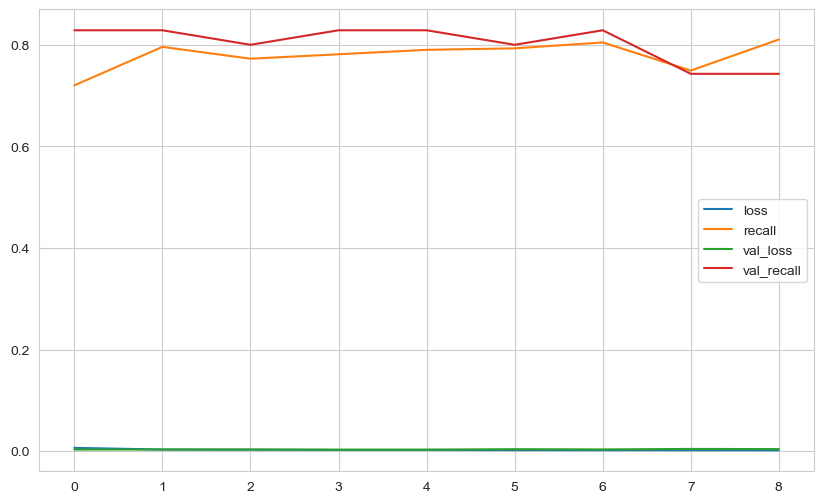

In [91]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [92]:
model.evaluate(X_test_scaled, y_test, verbose=0) 

[0.0036311133299022913, 0.75789475440979]

In [93]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", accuracy)

loss :  0.0036311133299022913
Recall :  0.75789475440979


In [94]:
y_pred = model.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 1s 439us/step
[[56640    11]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



***vi. Plot Precision and Recall Curve***

1774/1774 [==============================] - 1s 377us/step


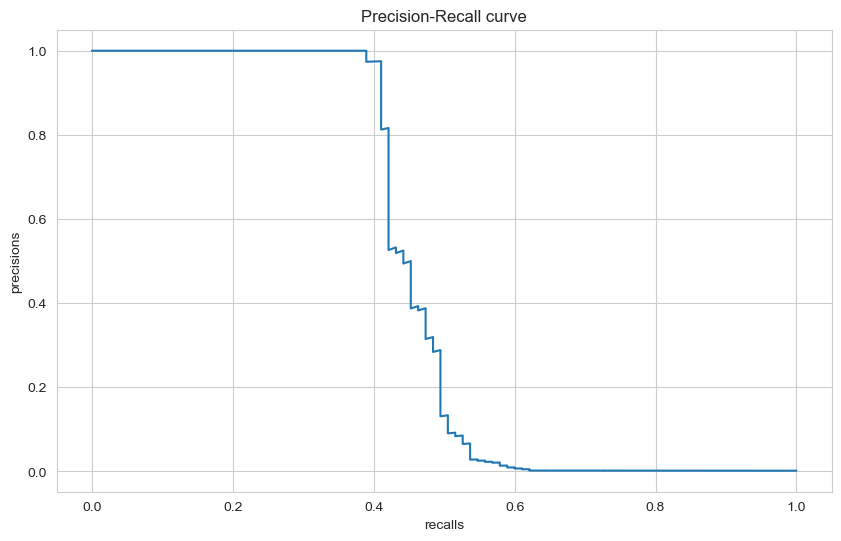

In [95]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [96]:
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test_scaled) > 0.5
ann_f1=f1_score(y_test,y_pred)
ann_recall=recall_score(y_test,y_pred)
ann_ap=average_precision_score(y_test, y_pred_proba)
ann_ap,ann_f1,ann_recall

1774/1774 [==============================] - 1s 400us/step


(0.4556468552413621, 0.8089887640449439, 0.7578947368421053)

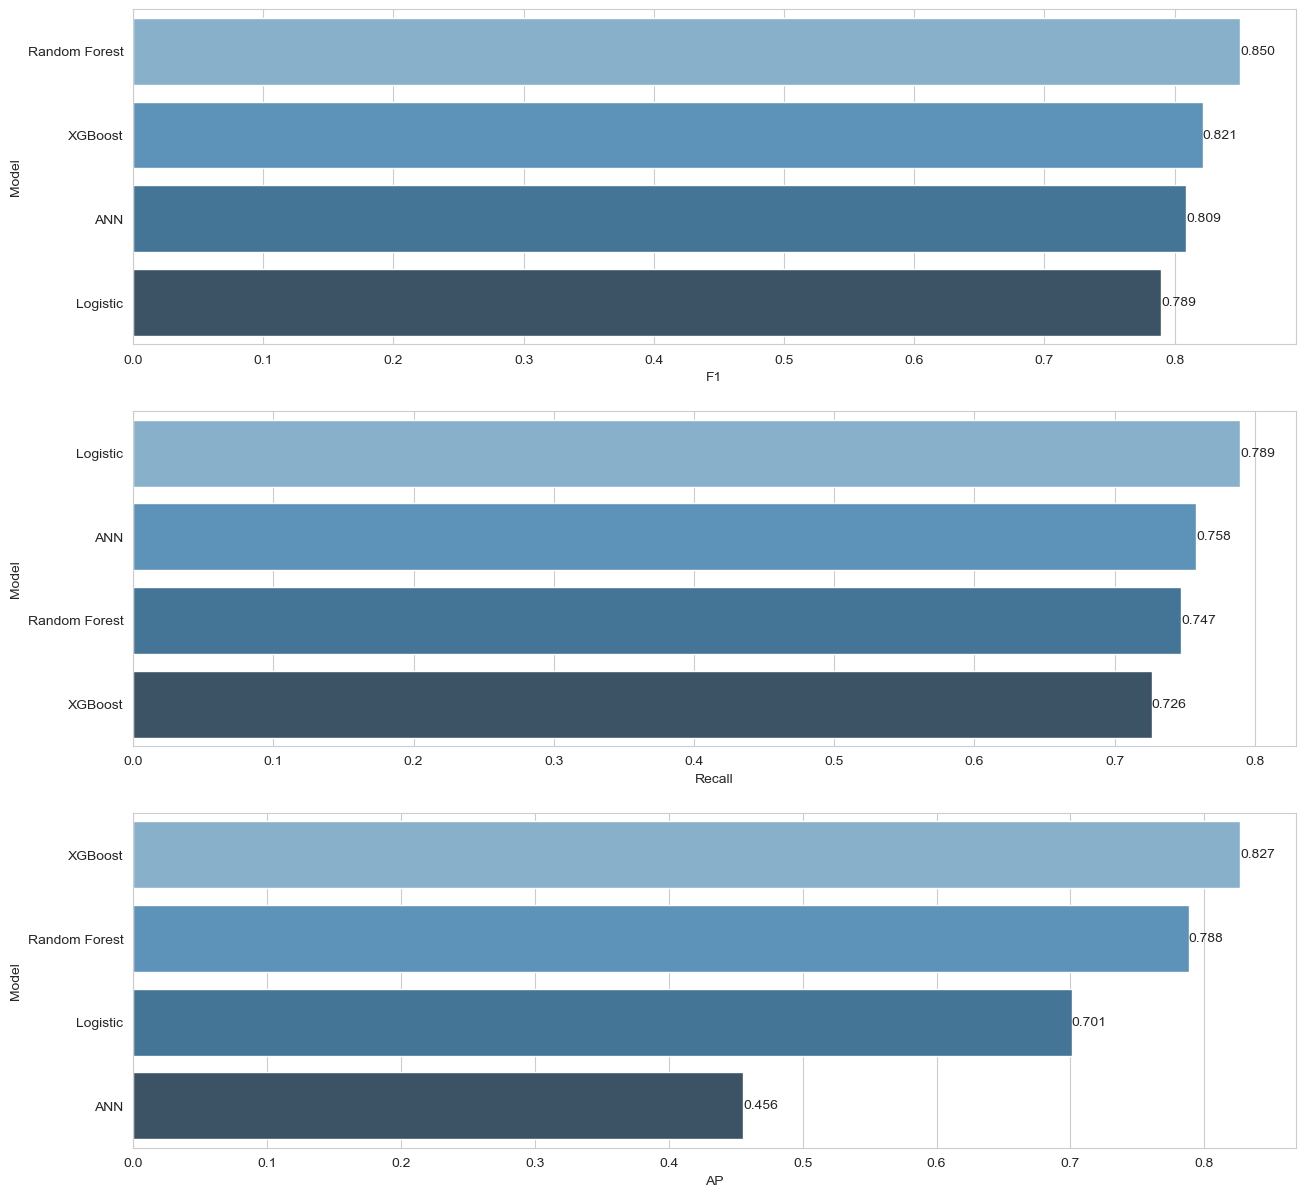

In [97]:
compare = pd.DataFrame({"Model": ["Logistic", "Random Forest", "XGBoost", "ANN"],
                        "F1": [log_f1, rf_f1, xgb_f1, ann_f1],
                        "Recall": [log_recall, rf_recall, xgb_recall, ann_recall],
                        "AP": [log_ap, rf_ap, xgb_ap, ann_ap]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,20))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)

In [98]:
rf_model=RandomForestClassifier(class_weight=class_weights,max_depth=15, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=15, random_state=42)

In [99]:
features=list(X_train.columns)
features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [100]:
rf_feature_imp = pd.DataFrame(data = rf_model.feature_importances_, index = features, #index=X.columns
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
V17,0.15
V12,0.13
V14,0.13
V10,0.09
V16,0.09
V11,0.08
V9,0.04
V18,0.03
V4,0.03
V7,0.03


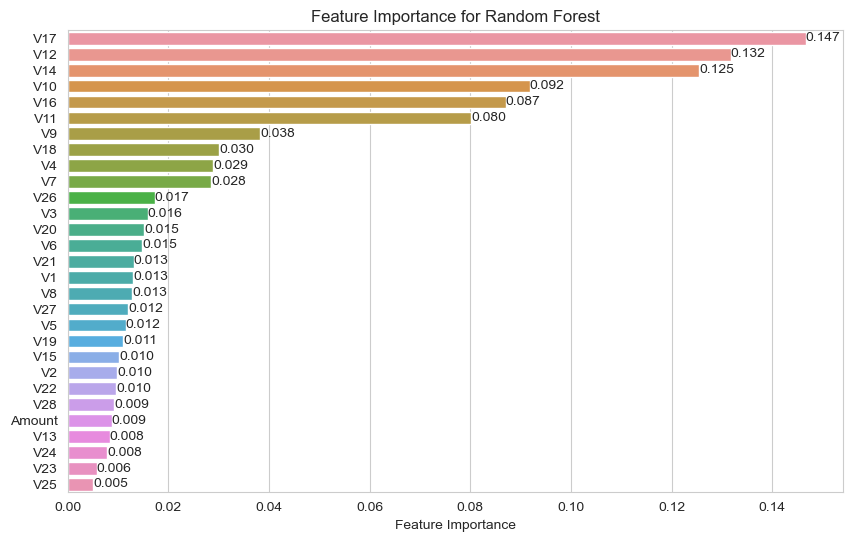

In [101]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [102]:
X_imp=df[["V17", "V12", "V14", "V16", "V10","V11"]]
X_imp.head()

,V17,V12,V14,V16,V10,V11
0,0.21,-0.62,-0.31,-0.47,0.09,-0.55
1,-0.11,1.07,-0.14,0.46,-0.17,1.61
2,1.11,0.07,-0.17,-2.89,0.21,0.62
3,-0.68,0.18,-0.29,-1.06,-0.05,-0.23
4,-0.24,0.54,-1.12,-0.45,0.75,-0.82


In [103]:
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2,stratify=y, random_state=42)

In [104]:
rf_model=RandomForestClassifier(class_weight=class_weights,max_depth=15, random_state=42)
rf_model.fit(X_imp_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=15, random_state=42)

In [105]:
eval_metric(rf_model, X_imp_train, y_train, X_imp_test, y_test)

Test_Set
[[56645     6]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [    43    335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      0.89      0.94       378

    accuracy                           1.00    226980
   macro avg       1.00      0.94      0.97    226980
weighted avg       1.00      1.00      1.00    226980



## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [106]:
import pickle

In [107]:
X_imp=df[["V17", "V12", "V14", "V16", "V10","V11"]]
X_imp.head()

,V17,V12,V14,V16,V10,V11
0,0.21,-0.62,-0.31,-0.47,0.09,-0.55
1,-0.11,1.07,-0.14,0.46,-0.17,1.61
2,1.11,0.07,-0.17,-2.89,0.21,0.62
3,-0.68,0.18,-0.29,-1.06,-0.05,-0.23
4,-0.24,0.54,-1.12,-0.45,0.75,-0.82


In [108]:
final_model=RandomForestClassifier(class_weight={0 : 1, 1 : 1},max_depth=15, random_state=42)
final_model.fit(X_imp,y)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=15, random_state=42)

### Save and Export Variables

In [109]:
pickle.dump(final_model, open("final_model_fraud", 'wb'))

In [110]:
df_0=df[["V17", "V12", "V14", "V16", "V10","V11", "Class"]][df.Class==0].sample(10)
df_0

,V17,V12,V14,V16,V10,V11,Class
176406,0.37,-0.95,-0.75,0.46,-0.79,-1.13,0
6990,0.21,-2.07,2.12,0.16,-0.16,2.03,0
187965,-0.60,1.14,0.05,0.30,0.03,-0.21,0
266409,-0.08,0.46,-1.32,0.98,-1.17,0.73,0
16740,-0.31,1.14,0.38,0.24,-0.72,1.05,0
263772,-0.87,-0.46,0.14,0.98,0.23,-0.68,0
123268,-0.63,0.55,-0.21,0.50,-0.17,-0.71,0
219908,0.22,0.50,-0.87,0.36,-1.20,-1.06,0
86974,-0.07,0.62,0.36,-0.32,-0.14,0.18,0
207222,-0.08,-0.18,-0.70,1.07,-0.36,-0.80,0


In [111]:
df_1=df[["V17", "V12", "V14", "V16", "V10","V11", "Class"]][df.Class==1].sample(10)
df_1

,V17,V12,V14,V16,V10,V11,Class
231978,2.35,-0.34,-3.69,0.53,-0.89,-1.59,1
59539,-7.14,-3.53,-3.46,-2.47,-2.50,2.56,1
6717,-3.54,-10.48,-11.74,-2.44,-7.45,7.39,1
6971,-5.14,-7.00,-3.74,-2.01,-1.99,4.69,1
42741,-21.91,-13.28,-13.42,-10.92,-13.22,6.90,1
183106,6.44,-1.96,-7.12,2.13,-2.28,1.85,1
58422,0.33,-0.79,-0.13,-0.64,0.23,-1.06,1
52584,-5.25,-3.52,-4.45,-2.91,-2.76,3.44,1
146790,-2.04,-0.86,-1.02,1.15,1.99,0.50,1
154670,-7.81,-10.65,-12.91,-7.95,-8.99,7.86,1


In [112]:
df_con=pd.concat([df_0,df_1], axis=0)
df_con

,V17,V12,V14,V16,V10,V11,Class
176406,0.37,-0.95,-0.75,0.46,-0.79,-1.13,0
6990,0.21,-2.07,2.12,0.16,-0.16,2.03,0
187965,-0.60,1.14,0.05,0.30,0.03,-0.21,0
266409,-0.08,0.46,-1.32,0.98,-1.17,0.73,0
16740,-0.31,1.14,0.38,0.24,-0.72,1.05,0
263772,-0.87,-0.46,0.14,0.98,0.23,-0.68,0
123268,-0.63,0.55,-0.21,0.50,-0.17,-0.71,0
219908,0.22,0.50,-0.87,0.36,-1.20,-1.06,0
86974,-0.07,0.62,0.36,-0.32,-0.14,0.18,0
207222,-0.08,-0.18,-0.70,1.07,-0.36,-0.80,0


In [113]:
final_model = pickle.load(open("final_model_fraud", "rb"))

In [114]:
predictions = final_model.predict(df_con.drop("Class", axis=1))
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [115]:
df_con["prediction"]=predictions
df_con

,V17,V12,V14,V16,V10,V11,Class,prediction
176406,0.37,-0.95,-0.75,0.46,-0.79,-1.13,0,0
6990,0.21,-2.07,2.12,0.16,-0.16,2.03,0,0
187965,-0.60,1.14,0.05,0.30,0.03,-0.21,0,0
266409,-0.08,0.46,-1.32,0.98,-1.17,0.73,0,0
16740,-0.31,1.14,0.38,0.24,-0.72,1.05,0,0
263772,-0.87,-0.46,0.14,0.98,0.23,-0.68,0,0
123268,-0.63,0.55,-0.21,0.50,-0.17,-0.71,0,0
219908,0.22,0.50,-0.87,0.36,-1.20,-1.06,0,0
86974,-0.07,0.62,0.36,-0.32,-0.14,0.18,0,0
207222,-0.08,-0.18,-0.70,1.07,-0.36,-0.80,0,0


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___